In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('Stores.csv')

In [6]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [7]:
#using groupby for know if Daily_Customer_Count, Items_Available & Store_Area depend on Store_Sales or one only
df[['Items_Available','Store_Sales','Daily_Customer_Count','Store_Area']].groupby(['Store_Sales'],as_index=False).mean().sort_values(by='Store_Sales',ascending = False)

,Store_Sales,Items_Available,Daily_Customer_Count,Store_Area
815,116320,2414.0,860.0,1989.0
814,105150,2104.0,980.0,1775.0
813,102920,1638.0,680.0,1365.0
812,102310,1587.0,1310.0,1303.0
811,101820,1758.0,820.0,1486.0
...,...,...,...,...
4,21300,1686.0,850.0,1397.0
3,20270,1946.0,870.0,1624.0
2,17670,1877.0,660.0,1537.0
1,16370,1790.0,880.0,1477.0


In [8]:
#no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [9]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [10]:
df.duplicated().sum()

0

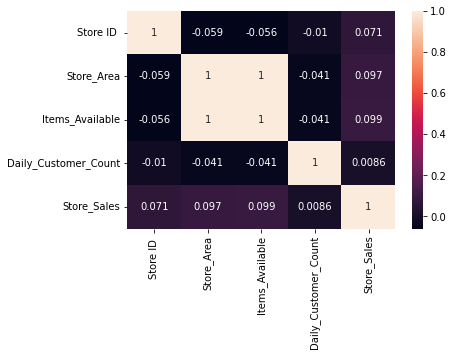

In [11]:
#to know which column depend on Store_Sales using graph with numbers
#then we will see Items_Available(0.099) & Store_Area (0.097) depend on Store_Sales (these bigger two columns depend on Store_Sales)
sns.heatmap(df.corr(),annot=True)

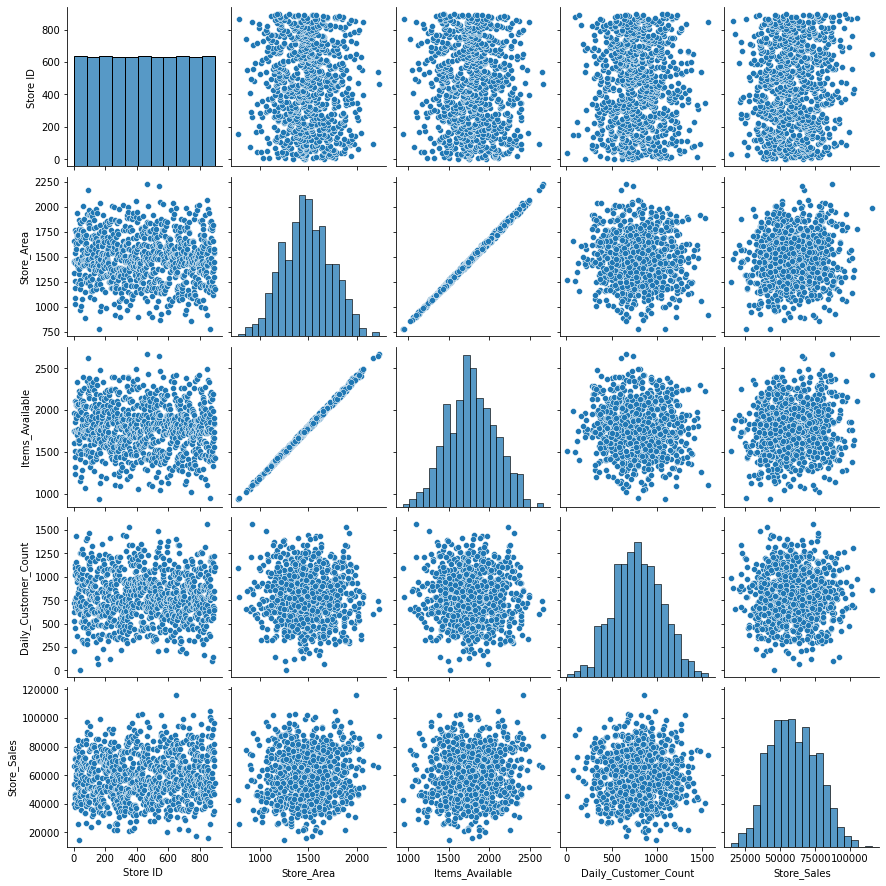

In [12]:
#to know which column depend on Store_Sales using graph only
#from this graph we will see Store_Area depend on Items_Available
sns.pairplot(df)

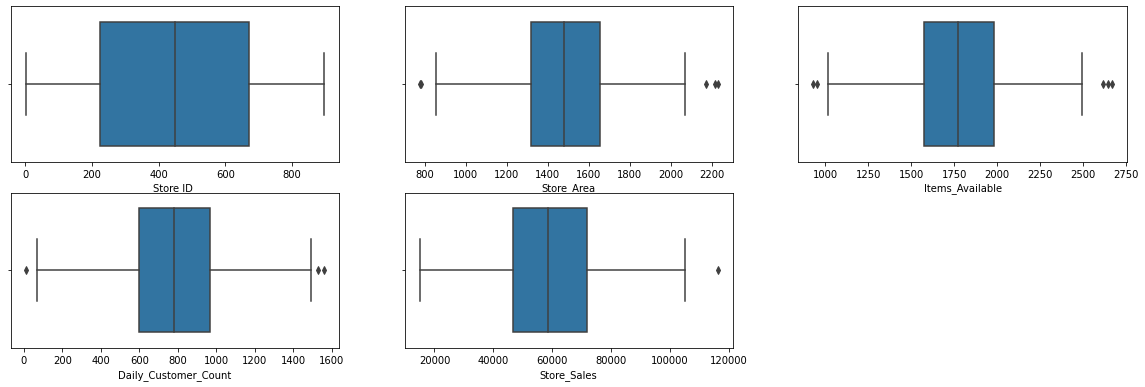

In [13]:
i = 1
plt.figure(figsize=(20,20))
for outliars in df.columns:
  plt.subplot(6,3,i)
  sns.boxplot(x=df[outliars])
  i+=1

1 Quartile:  46530.0
2 Quartile:  58605.0
3 Quartile:  71872.5
4 Quartile:  116320.0
Salary above:  109886.25 are outliars


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


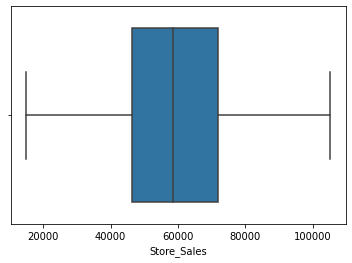

In [14]:
#outliars in Store_Sales column
#calculate Quartiles
print('1 Quartile: ',df['Store_Sales'].quantile(q=0.25))
print('2 Quartile: ',df['Store_Sales'].quantile(q=0.50))
print('3 Quartile: ',df['Store_Sales'].quantile(q=0.75))
print('4 Quartile: ',df['Store_Sales'].quantile(q=1.00))
print('Salary above: ',df['Store_Sales'].quantile(q=0.75) + 1.5 * (df['Store_Sales'].quantile(q=0.75) - df['Store_Sales'].quantile(q=0.25)),'are outliars')
df.drop(df[df.Store_Sales > 109886.25].index, inplace = True)
sns.boxplot(df['Store_Sales'])

1 Quartile:  1316.5
2 Quartile:  1477.0
3 Quartile:  1652.5
4 Quartile:  2229.0
lower_limit:  812.5
upper_limit: 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 2156.5


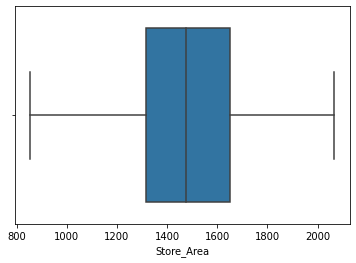

In [15]:
#outliars in Store_Area column
#calculate Quartiles
print('1 Quartile: ',df['Store_Area'].quantile(q=0.25))
print('2 Quartile: ',df['Store_Area'].quantile(q=0.50))
print('3 Quartile: ',df['Store_Area'].quantile(q=0.75))
print('4 Quartile: ',df['Store_Area'].quantile(q=1.00))
#IQR = Q3- Q1
IQR = df['Store_Area'].quantile(q=0.75) - df['Store_Area'].quantile(q=0.25)
print('lower_limit: ',df['Store_Area'].quantile(q=0.25) - 1.5 * IQR)
print('upper_limit: ',df['Store_Area'].quantile(q=0.75) + 1.5 * IQR)
df.drop(df[df.Store_Area < 812.5].index, inplace = True)
df.drop(df[df.Store_Area > 2156.5].index, inplace = True)
sns.boxplot(df['Store_Area'])


1 Quartile:  1576.0
2 Quartile:  1773.0
3 Quartile:  1981.75
4 Quartile:  2493.0
lower_limit:  967.375
upper_limit:  2590.375


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


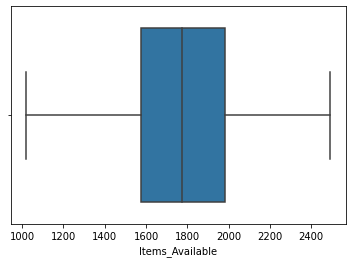

In [16]:
#outliars in Items_Available column
#calculate Quartiles
print('1 Quartile: ',df['Items_Available'].quantile(q=0.25))
print('2 Quartile: ',df['Items_Available'].quantile(q=0.50))
print('3 Quartile: ',df['Items_Available'].quantile(q=0.75))
print('4 Quartile: ',df['Items_Available'].quantile(q=1.00))
#IQR = Q3- Q1
IQR = df['Items_Available'].quantile(q=0.75) - df['Items_Available'].quantile(q=0.25)
print('lower_limit: ',df['Items_Available'].quantile(q=0.25) - 1.5 * IQR)
print('upper_limit: ',df['Items_Available'].quantile(q=0.75) + 1.5 * IQR)
df.drop(df[df.Items_Available < 967.375].index, inplace = True)
df.drop(df[df.Items_Available > 2590.375].index, inplace = True)
sns.boxplot(df['Items_Available'])


1 Quartile:  600.0
2 Quartile:  780.0
3 Quartile:  970.0
4 Quartile:  1560.0
lower_limit:  1509.0
upper_limit:  61.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


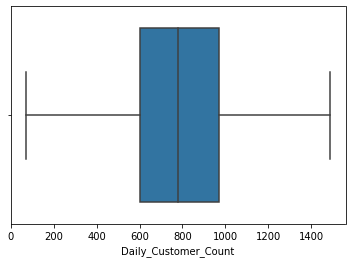

In [17]:
#outliars in Daily_Customer_Count column
#calculate Quartiles
print('1 Quartile: ',df['Daily_Customer_Count'].quantile(q=0.25))
print('2 Quartile: ',df['Daily_Customer_Count'].quantile(q=0.50))
print('3 Quartile: ',df['Daily_Customer_Count'].quantile(q=0.75))
print('4 Quartile: ',df['Daily_Customer_Count'].quantile(q=1.00))
#IQR = Q3- Q1
IQR = df['Daily_Customer_Count'].quantile(q=0.75) - df['Items_Available'].quantile(q=0.25)
print('lower_limit: ',df['Daily_Customer_Count'].quantile(q=0.25) - 1.5 * IQR)
print('upper_limit: ',df['Daily_Customer_Count'].quantile(q=0.75) + 1.5 * IQR)
df.drop(df[df.Daily_Customer_Count < 61.0].index, inplace = True)
df.drop(df[df.Daily_Customer_Count > 1509.0].index, inplace = True)
sns.boxplot(df['Daily_Customer_Count'])


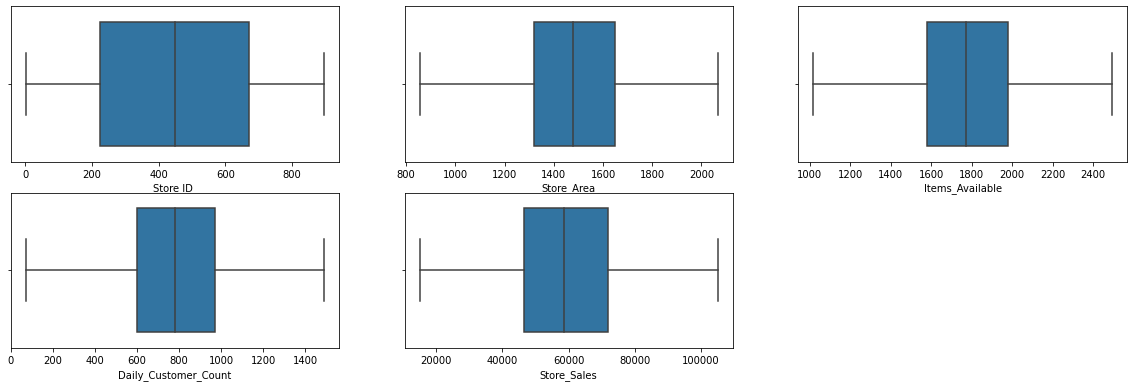

In [18]:
#check outliars again
#I removed all outliars
i = 1
plt.figure(figsize=(20,20))
for outliars in df.columns:
  plt.subplot(6,3,i)
  sns.boxplot(x=df[outliars])
  i+=1

In [19]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,887.000000,887.000000,887.000000,887.000000,887.000000
mean,448.525366,1484.437430,1780.871477,785.490417,59317.125141
std,258.428650,243.905688,292.307040,262.671553,17070.126169
min,1.000000,854.000000,1018.000000,70.000000,14920.000000
25%,225.500000,1317.500000,1577.500000,600.000000,46600.000000
50%,448.000000,1477.000000,1773.000000,780.000000,58600.000000
75%,672.500000,1650.000000,1981.500000,970.000000,71805.000000
max,896.000000,2067.000000,2493.000000,1490.000000,105150.000000


In [30]:
def Store_Area(data):
  data.loc[data['Store_Area'] < 1317.5 , 'Store_Area'] = 1
  data.loc[(data['Store_Area']> 1317.5) & (data['Store_Area'] <= 1477)] = 2
  data.loc[(data['Store_Area']> 1477) & (data['Store_Area'] <= 1650)] = 3
  data.loc[(data['Store_Area']> 1650) & (data['Store_Area'] <= 2067)] = 4
  return data



In [32]:
def Items_Available(data):
  data.loc[data['Items_Available'] < 1577.5 , 'Items_Available'] = 1
  data.loc[(data['Items_Available']> 1577.5) & (data['Items_Available'] <= 1773)] = 2
  data.loc[(data['Items_Available']> 1773) & (data['Items_Available'] <= 1981.5)] = 3
  data.loc[(data['Items_Available']> 1981.5) & (data['Items_Available'] <= 2493)] = 4
  return data

In [33]:
def Daily_Customer_Count(data):
  data.loc[data['Daily_Customer_Count'] < 600 , 'Daily_Customer_Count'] = 1
  data.loc[(data['Daily_Customer_Count']> 600) & (data['Daily_Customer_Count'] <= 780)] = 2
  data.loc[(data['Daily_Customer_Count']> 780) & (data['Daily_Customer_Count'] <= 970)] = 3
  data.loc[(data['Daily_Customer_Count']> 970) & (data['Daily_Customer_Count'] <= 1490)] = 4
  return data

In [34]:
def Store_Sales(data):
  data.loc[data['Store_Sales'] < 46600 , 'Store_Sales'] = 1
  data.loc[(data['Store_Sales']> 46600) & (data['Store_Sales'] <= 58600)] = 2
  data.loc[(data['Store_Sales']> 58600) & (data['Store_Sales'] <= 71805)] = 3
  data.loc[(data['Store_Sales']> 71805) & (data['Store_Sales'] <= 105150)] = 4
  return data

In [52]:
X=df.drop(['Store_Sales'],axis=1)
y = df['Store_Sales']


In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
modelKNR = KNeighborsRegressor()
modelKNR.fit(X_train,y_train)
y_pred = modelKNR.predict(X_test)
r2_score(y_test,y_pred)


0.8686952750337362

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
modelRFR = RandomForestRegressor()
modelRFR.fit(X_train,y_train)
y_pred = modelRFR.predict(X_test)
r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred)


(0.8698590582745268, 3955.3613483146073)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
modelLR = LinearRegression()
modelLR.fit(X_train,y_train)
y_pred = modelLR.predict(X_test)
r2_score(y_test,y_pred)


0.8747151270590996

In [56]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
modelEN = ElasticNet()
modelEN.fit(X_train,y_train)
y_pred = modelEN.predict(X_test)
r2_score(y_test,y_pred)


0.8747151761584562

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
modelGBR = GradientBoostingRegressor()
modelGBR.fit(X_train,y_train)
y_pred = modelGBR.predict(X_test)
r2_score(y_test,y_pred)


0.8464062461189864

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
modelDCR = DecisionTreeRegressor()
modelDCR.fit(X_train,y_train)
y_pred = modelDCR.predict(X_test)
r2_score(y_test,y_pred)


0.8058438216616743